<a href="https://colab.research.google.com/github/abuy69/abuy69/blob/main/Global_Prosperity_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls "/data global development & prosperity ranking.csv - data.csv.csv"

'/data global development & prosperity ranking.csv - data.csv.csv'


In [ ]:
import pandas as pd

file_path = "/data global development & prosperity ranking.csv - data.csv.csv"
df = pd.read_csv(file_path)
# Rename the 'Averag' column to 'Average'
df.rename(columns={'AveragScore': 'AverageScore'}, inplace=True)

# Verify the change
print(df.columns)

print(df.head())
#data preview

Index(['Country', 'Continent', 'AverageScore', 'SafetySecurity',
       'PersonelFreedom', 'Governance', 'SocialCapital',
       'InvestmentEnvironment', 'EnterpriseConditions',
       'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions',
       'Health', 'Education', 'NaturalEnvironment'],
      dtype='object')
         Country Continent  AverageScore  SafetySecurity  PersonelFreedom  \
0        Denmark    Europe         84.55           92.59            94.09   
1         Sweden    Europe         83.67           90.97            91.90   
2         Norway    Europe         83.59           93.30            94.10   
3        Finland    Europe         83.47           89.56            91.96   
4    Switzerland    Europe         83.42           95.66            87.50   

   Governance  SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0       89.45          82.56                  82.42                 79.64   
1       86.41          78.29                  82.81   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


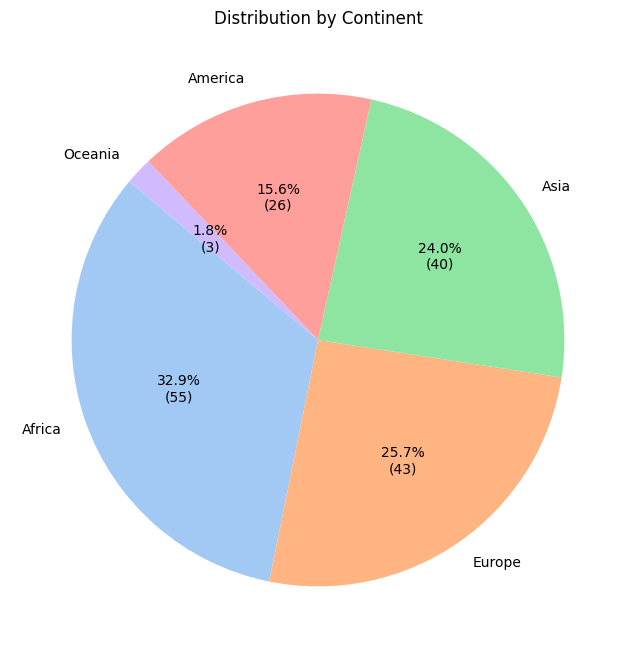

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by continent and count the occurrences
continent_counts = df['Continent'].value_counts()

# Custom autopct function to show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct=make_autopct(continent_counts), startangle=140, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Distribution by Continent')

# Show the plot
plt.show()


<ipython-input-40-d3af2ad85ac0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_scores, y=country_scores.index, palette="pastel")


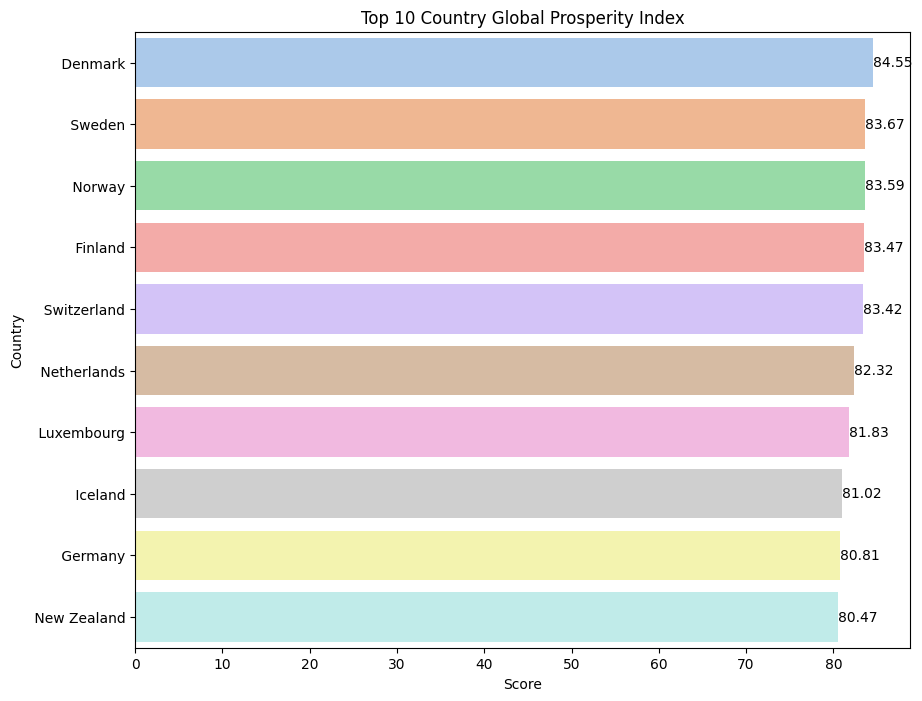

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  average score of each country
country_scores = df.groupby('Country')['AverageScore'].mean().sort_values(ascending=False).head(10)

# Plotting the top 10 countries
plt.figure(figsize=(10, 8))
sns.barplot(x=country_scores, y=country_scores.index, palette="pastel")

# Labels in bar
for index, value in enumerate(country_scores):
    plt.text(value, index, f'{value:.2f}', va='center')

#title and axis label
plt.title('Top 10 Country Global Prosperity Index')
plt.xlabel('Score')
plt.ylabel('Country')


plt.show()


In [ ]:
pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.2 MB/s eta 0:00:00


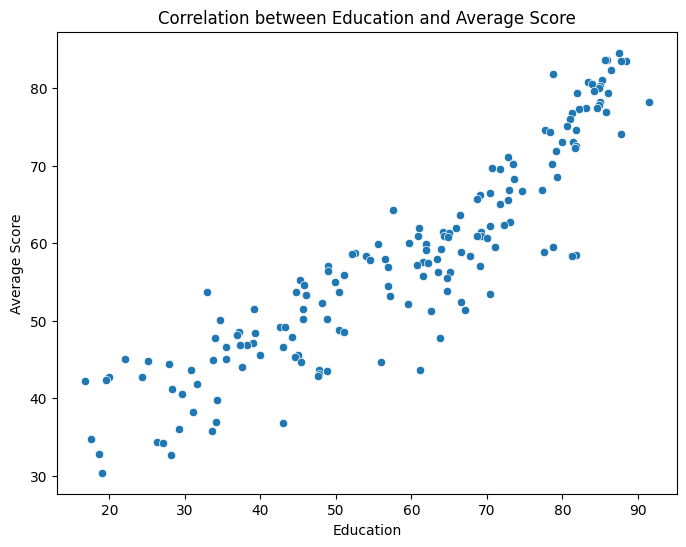

Correlation coefficient between Education and Average Score: 0.91


In [ ]:
# prompt: correlation education and average score,  show p value and wether it is significant or not shows scatter plot

import matplotlib.pyplot as plt
from scipy import stats

# Calculate correlation and p-value
correlation, p_value = stats.pearsonr(df['Education'], df['AverageScore'])

# Print results
print(f"Correlation between Education and Average Score: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")

# Determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education', y='AverageScore', data=df)
plt.title('Scatter Plot of Education vs. Average Score')
plt.xlabel('Education')
plt.ylabel('Average Score')
plt.show()


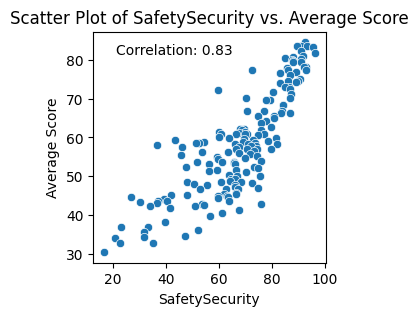

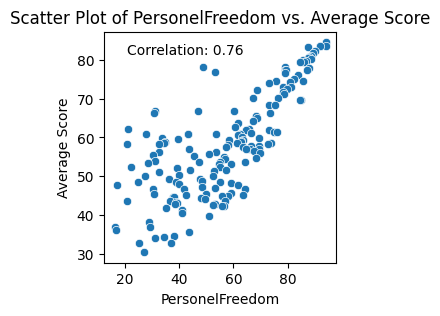

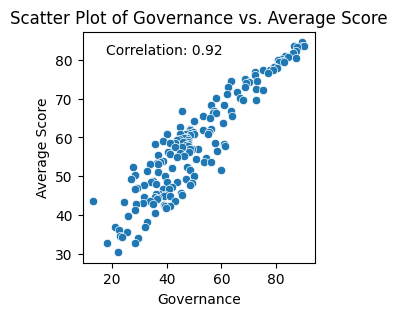

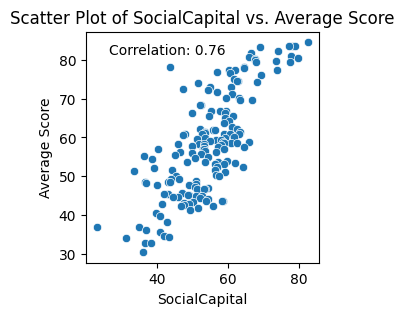

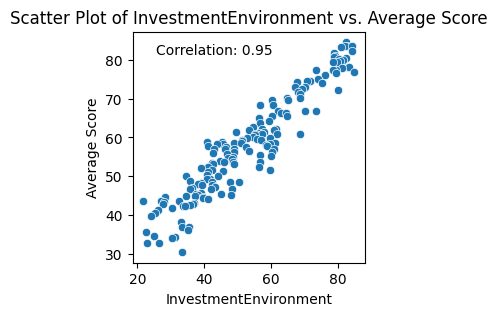

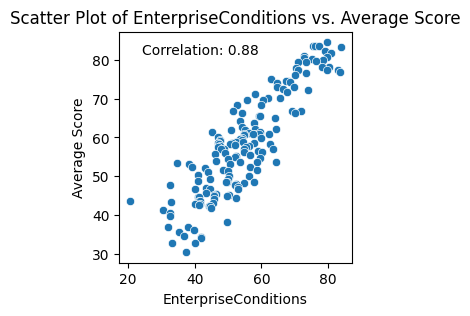

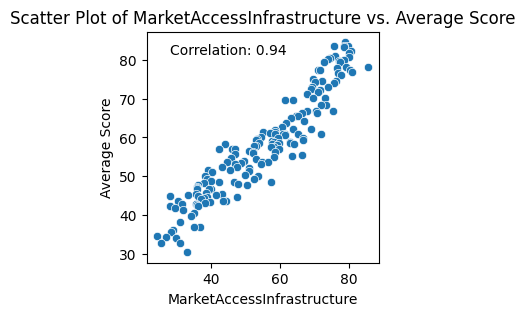

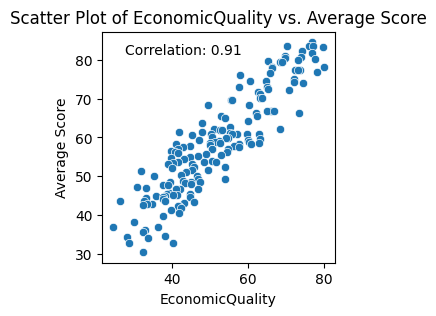

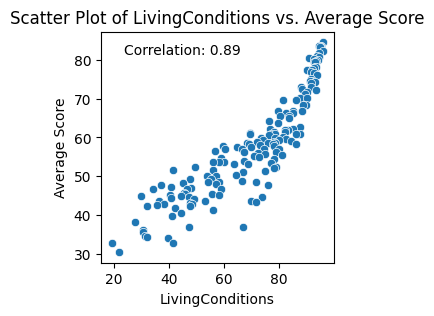

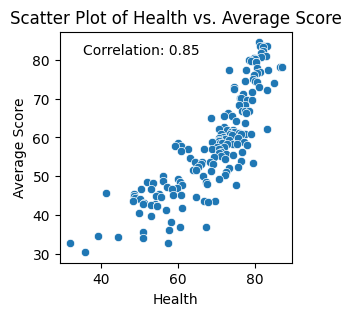

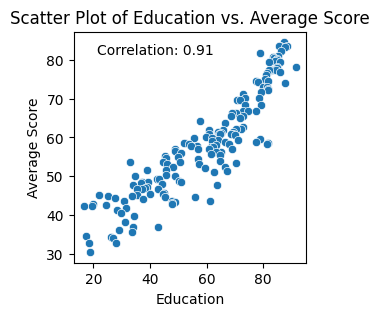

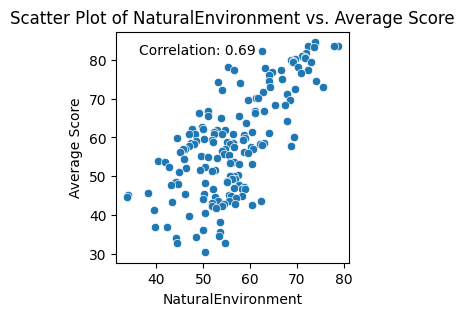

In [ ]:
# prompt: correlation all variables with average scores in scatter plot then shows it

import matplotlib.pyplot as plt
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number'])

# Calculate correlations with 'AverageScore'
correlations = numerical_columns.corr()['AverageScore']

# Create scatter plots for each variable against 'AverageScore'
for column in numerical_columns.columns:
    if column != 'AverageScore':
        plt.figure(figsize=(3, 3))
        sns.scatterplot(x=column, y='AverageScore', data=df)
        plt.title(f'Scatter Plot of {column} vs. Average Score')
        plt.xlabel(column)
        plt.ylabel('Average Score')

        # Calculate and display correlation on the plot
        correlation = correlations[column]
        plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

        plt.show()


In [ ]:
# prompt: list all correlation score in table order by highest to lowest add p value column, remove number column on the left

import pandas as pd
from scipy import stats

# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number'])

# Calculate correlations with 'AverageScore' and p-values
correlations = []
for column in numerical_columns.columns:
    if column != 'AverageScore':
        corr, p_value = stats.pearsonr(df[column], df['AverageScore'])
        correlations.append({'Variable': column, 'Correlation': corr, 'P-value': p_value})

# Create a DataFrame from the correlations
corr_df = pd.DataFrame(correlations)

# Sort by correlation in descending order
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Reset index to remove the default numerical index
corr_df = corr_df.reset_index(drop=True)

# Display the correlation table
print(corr_df)


                      Variable  Correlation       P-value
0        InvestmentEnvironment     0.948649  2.178477e-84
1   MarketAccessInfrastructure     0.943341  5.855815e-81
2                   Governance     0.924059  8.201219e-71
3                    Education     0.910275  4.349559e-65
4              EconomicQuality     0.906294  1.321802e-63
5             LivingConditions     0.894489  1.430845e-59
6         EnterpriseConditions     0.884038  2.218950e-56
7                       Health     0.845327  8.755832e-47
8               SafetySecurity     0.828604  2.008552e-43
9                SocialCapital     0.764596  2.692890e-33
10             PersonelFreedom     0.763093  4.250665e-33
11          NaturalEnvironment     0.691873  4.076113e-25
